# 1. Análisis Exploratorio de Datos (EDA)

**Objetivo:** Entender la estructura, calidad y características principales del conjunto de datos clínicos de Huancayo. Este análisis es el primer paso fundamental del ciclo de vida de un proyecto de Machine Learning y guiará las decisiones de preprocesamiento y modelado.

## 1.1. Configuración Inicial e Importación de Librerías

Importamos las librerías esenciales para el análisis y manipulación de datos, así como para la visualización.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración para visualizaciones
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


In [2]:
# --- INICIO: Celda de configuración para guardado --- 
# 1. Crear carpetas para los reportes si no existen
FIGS_PATH = "../reports/figures/eda"
METRICS_PATH = "../reports/metrics"
os.makedirs(FIGS_PATH, exist_ok=True)
os.makedirs(METRICS_PATH, exist_ok=True)

# 2. Inicializar contadores
nuevos_graficos = 0
graficos_omitidos = 0
nuevas_tablas = 0
tablas_omitidas = 0

print(f"Directorios listos en: {FIGS_PATH} y {METRICS_PATH}")
print("Contadores inicializados.")

Directorios listos en: ../reports/figures/eda y ../reports/metrics
Contadores inicializados.


## 1.2. Carga de Datos

Cargamos el dataset desde el archivo CSV. Es importante especificar la ruta correcta y revisar las primeras filas para asegurar que la carga fue exitosa.

In [4]:
DATA_PATH = "../data/processed/dataset_clinico_huancayo_20k_processed.csv"
try:
    df = pd.read_csv(DATA_PATH)
    print(f"Dataset cargado exitosamente. Dimensiones: {df.shape}")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {DATA_PATH}")

Dataset cargado exitosamente. Dimensiones: (20000, 54)


## 1.3. Descripción General del Dataset

In [5]:
 # Guardar la tabla
path_tabla = os.path.join(METRICS_PATH, "dataset_head.csv")
if not os.path.exists(path_tabla):
    df.head().to_csv(path_tabla, index=False)
    print(f"✅ Tabla guardada en {path_tabla}")
    nuevas_tablas += 1
else:
    print(f"⏭️ Archivo {path_tabla} ya existe, omitiendo...")
    tablas_omitidas += 1
df.head()

✅ Tabla guardada en ../reports/metrics\dataset_head.csv


,id,edad,sexo,area,distrito,ocupacion,imc,pas,pad,fc,...,sintoma_debilidad,sintoma_palpitaciones,sintoma_vomitos,sintoma_malestar_general,sintoma_mareo,sintoma_dolor_garganta,sintoma_epistaxis,sintoma_congestion_nasal,sintoma_fatiga,sintoma_dolor_pecho
0,1,12,0,1,2,8,23.8,127,75,94,...,0,0,0,1,0,0,0,0,0,1
1,2,19,0,1,7,4,30.5,110,73,98,...,0,0,0,0,0,0,0,0,0,0
2,3,51,0,1,3,5,27.9,126,76,84,...,0,0,0,0,0,0,0,0,0,0
3,4,44,0,1,4,7,34.9,157,110,92,...,0,0,0,0,0,0,1,0,1,0
4,5,14,0,1,9,8,22.2,119,81,103,...,0,0,0,1,0,1,0,1,0,1


In [ ]:
df.info()

In [6]:
descriptive_stats = df.describe()
path_tabla = os.path.join(METRICS_PATH, "descriptive_stats.csv")
if not os.path.exists(path_tabla):
    descriptive_stats.to_csv(path_tabla)
    print(f"✅ Tabla guardada en {path_tabla}")
    nuevas_tablas += 1
else:
    print(f"⏭️ Archivo {path_tabla} ya existe, omitiendo...")
    tablas_omitidas += 1
descriptive_stats

✅ Tabla guardada en ../reports/metrics\descriptive_stats.csv


,id,edad,sexo,area,distrito,ocupacion,imc,pas,pad,fc,...,sintoma_debilidad,sintoma_palpitaciones,sintoma_vomitos,sintoma_malestar_general,sintoma_mareo,sintoma_dolor_garganta,sintoma_epistaxis,sintoma_congestion_nasal,sintoma_fatiga,sintoma_dolor_pecho
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,...,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000
mean,10000.500000,45.814800,0.487550,0.848450,4.495100,7.863600,27.393150,132.944200,84.70085,89.095950,...,0.089800,0.065450,0.09330,0.150100,0.104700,0.148000,0.071850,0.15000,0.142800,0.151550
std,5773.647028,22.772785,0.499857,0.358593,2.876889,3.526616,4.191339,20.658965,11.63561,9.998762,...,0.285902,0.247324,0.29086,0.357178,0.306174,0.355109,0.258246,0.35708,0.349878,0.358593
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.500000,83.000000,65.00000,70.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5000.750000,31.000000,0.000000,1.000000,2.000000,6.000000,24.800000,117.000000,76.00000,82.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,10000.500000,49.000000,0.000000,1.000000,5.000000,8.000000,27.700000,128.000000,82.00000,89.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,15000.250000,64.000000,1.000000,1.000000,7.000000,10.000000,30.300000,147.000000,93.00000,95.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,20000.000000,87.000000,1.000000,1.000000,9.000000,14.000000,35.000000,199.000000,110.00000,110.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
null_values = df.isnull().sum()
path_tabla = os.path.join(METRICS_PATH, "null_values_summary.csv")
if not os.path.exists(path_tabla):
    null_values.to_csv(path_tabla)
    print(f"✅ Tabla guardada en {path_tabla}")
    nuevas_tablas += 1
else:
    print(f"⏭️ Archivo {path_tabla} ya existe, omitiendo...")
    tablas_omitidas += 1
null_values

✅ Tabla guardada en ../reports/metrics\null_values_summary.csv


id                                 0
edad                               0
sexo                               0
area                               0
distrito                           0
ocupacion                          0
imc                                0
pas                                0
pad                                0
fc                                 0
fr                                 0
temp                               0
spo2                               0
glucosa                            0
hba1c                              0
creatinina                         0
colesterol                         0
leucocitos                         0
tabaquismo                         0
alcoholismo                        0
sedentarismo                       0
ant_familiar_dm                    0
ant_familiar_hta                   0
tiempo_enfermedad                  0
diagnostico                        0
sintoma_diarrea                    0
sintoma_heridas_lentas             0
s

## 1.4. Análisis de la Variable Objetivo (`diagnostico`)

In [8]:
diagnostico_counts = df["diagnostico"].value_counts()
path_tabla = os.path.join(METRICS_PATH, "diagnostico_distribution.csv")
if not os.path.exists(path_tabla):
    diagnostico_counts.to_csv(path_tabla)
    print(f"✅ Tabla guardada en {path_tabla}")
    nuevas_tablas += 1
else:
    print(f"⏭️ Archivo {path_tabla} ya existe, omitiendo...")
    tablas_omitidas += 1
diagnostico_counts

✅ Tabla guardada en ../reports/metrics\diagnostico_distribution.csv


diagnostico
3    6000
2    5600
0    4800
1    3600
Name: count, dtype: int64

✅ Gráfico guardado en ../reports/figures/eda\diagnostico_distribution.png


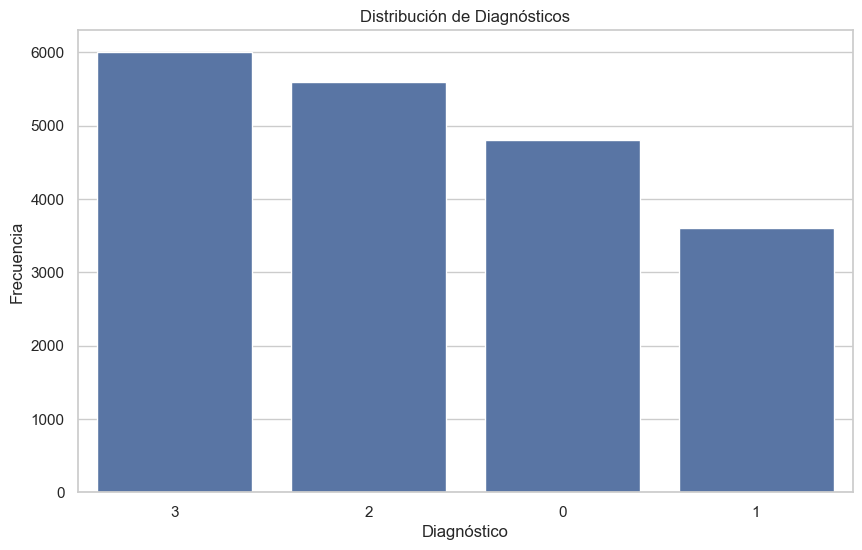

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="diagnostico", order=df["diagnostico"].value_counts().index)
plt.title("Distribución de Diagnósticos")
plt.xlabel("Diagnóstico")
plt.ylabel("Frecuencia")

path_figura = os.path.join(FIGS_PATH, "diagnostico_distribution.png")
if not os.path.exists(path_figura):
    plt.savefig(path_figura, dpi=300, bbox_inches="tight")
    print(f"✅ Gráfico guardado en {path_figura}")
    nuevos_graficos += 1
else:
    print(f"⏭️ Archivo {path_figura} ya existe, omitiendo...")
    graficos_omitidos += 1
plt.show()

## 1.5. Análisis de Variables Numéricas

✅ Gráfico guardado en ../reports/figures/eda\numeric_features_histograms.png


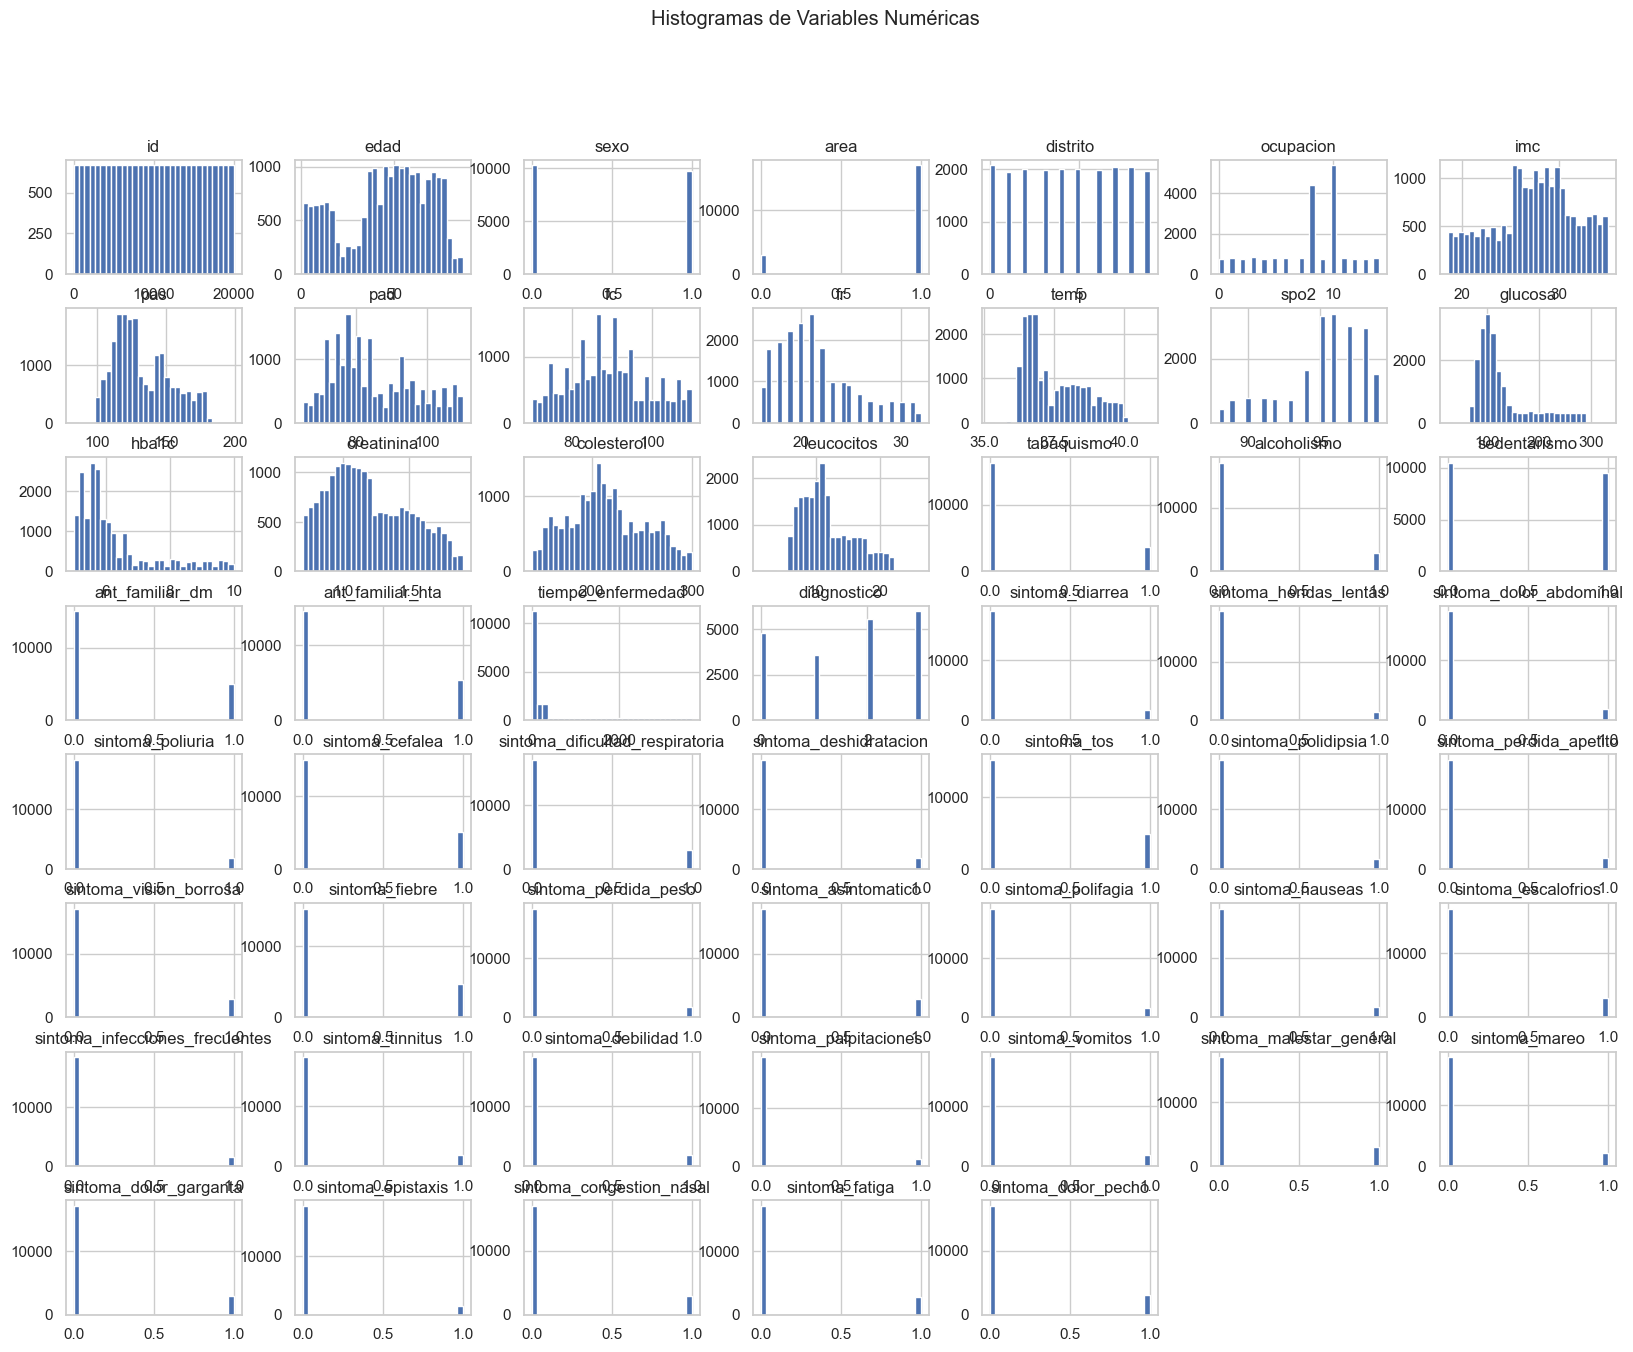

In [10]:
df.hist(bins=30, figsize=(20, 15))
plt.suptitle("Histogramas de Variables Numéricas")

path_figura = os.path.join(FIGS_PATH, "numeric_features_histograms.png")
if not os.path.exists(path_figura):
    plt.savefig(path_figura, dpi=300, bbox_inches="tight")
    print(f"✅ Gráfico guardado en {path_figura}")
    nuevos_graficos += 1
else:
    print(f"⏭️ Archivo {path_figura} ya existe, omitiendo...")
    graficos_omitidos += 1
plt.show()

✅ Tabla guardada en ../reports/metrics\correlation_matrix.csv
✅ Gráfico guardado en ../reports/figures/eda\correlation_heatmap.png


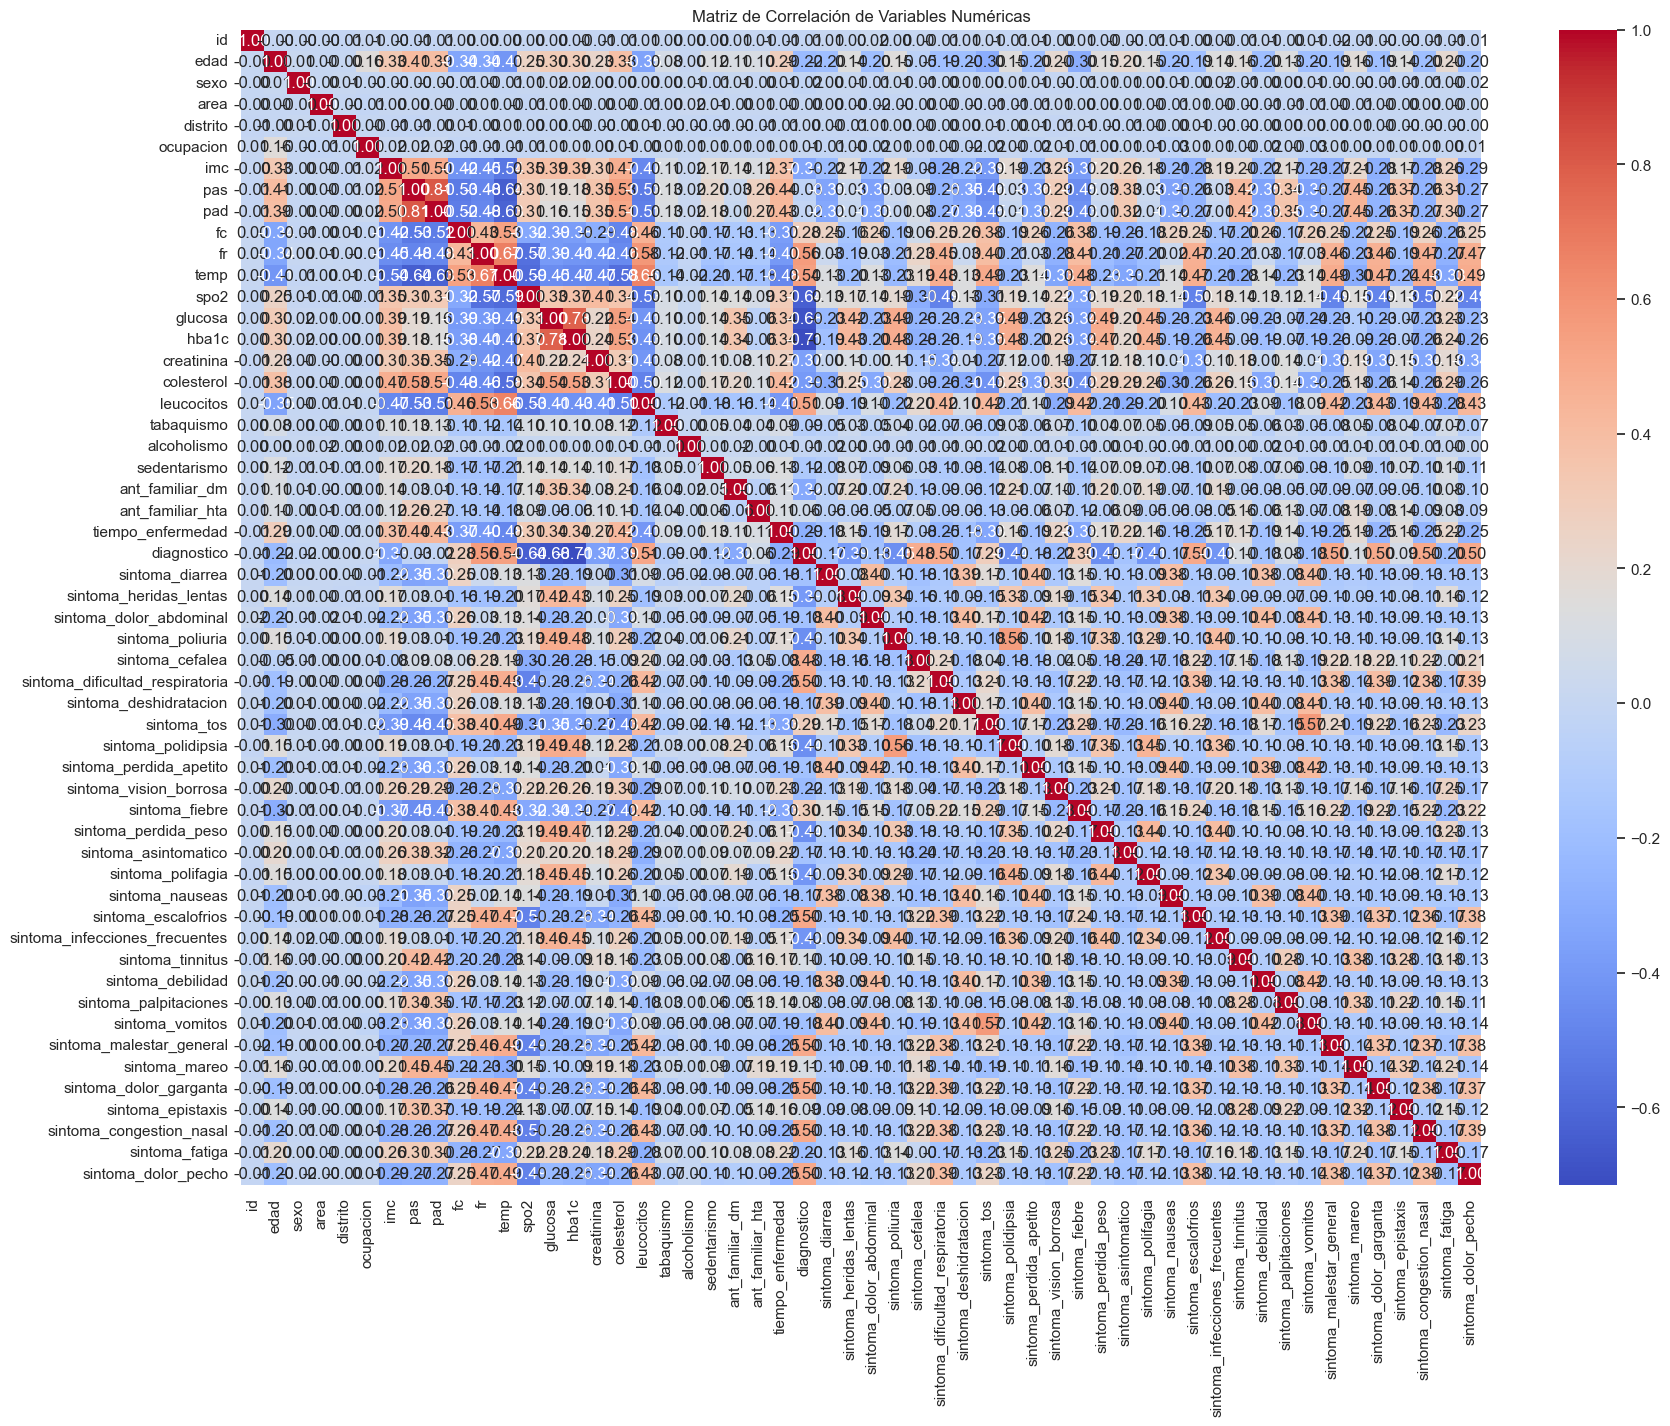

In [11]:
corr_matrix = df.select_dtypes(include=np.number).corr()

path_tabla = os.path.join(METRICS_PATH, "correlation_matrix.csv")
if not os.path.exists(path_tabla):
    corr_matrix.to_csv(path_tabla)
    print(f"✅ Tabla guardada en {path_tabla}")
    nuevas_tablas += 1
else:
    print(f"⏭️ Archivo {path_tabla} ya existe, omitiendo...")
    tablas_omitidas += 1

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación de Variables Numéricas")

path_figura = os.path.join(FIGS_PATH, "correlation_heatmap.png")
if not os.path.exists(path_figura):
    plt.savefig(path_figura, dpi=300, bbox_inches="tight")
    print(f"✅ Gráfico guardado en {path_figura}")
    nuevos_graficos += 1
else:
    print(f"⏭️ Archivo {path_figura} ya existe, omitiendo...")
    graficos_omitidos += 1
plt.show()

## 1.6. Análisis de Variables Categóricas

In [12]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
if "diagnostico" in categorical_cols:
    categorical_cols.remove("diagnostico")
print(f"Columnas categóricas a analizar: {categorical_cols}")

Columnas categóricas a analizar: []


In [13]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.xlabel("Frecuencia")
    plt.ylabel(col)
    plt.tight_layout()
    
    path_figura = os.path.join(FIGS_PATH, f"categorical_distribution_{col}.png")
    if not os.path.exists(path_figura):
        plt.savefig(path_figura, dpi=300, bbox_inches="tight")
        print(f"✅ Gráfico guardado en {path_figura}")
        nuevos_graficos += 1
    else:
        print(f"⏭️ Archivo {path_figura} ya existe, omitiendo...")
        graficos_omitidos += 1
    plt.show()

## 1.7. Resumen Final del EDA

In [14]:
# --- Resumen Final del Proceso ---
print("\n" + "="*50)
print("PROCESO DE GUARDADO COMPLETADO EN 01_EDA.ipynb")
print("="*50)
print(f"✅ Gráficos nuevos guardados: {nuevos_graficos}")
print(f"⏭️ Gráficos omitidos (ya existían): {graficos_omitidos}")
print(f"✅ Tablas nuevas guardadas: {nuevas_tablas}")
print(f"⏭️ Tablas omitidas (ya existían): {tablas_omitidas}")
print("="*50)


PROCESO DE GUARDADO COMPLETADO EN 01_EDA.ipynb
✅ Gráficos nuevos guardados: 3
⏭️ Gráficos omitidos (ya existían): 0
✅ Tablas nuevas guardadas: 5
⏭️ Tablas omitidas (ya existían): 0
